In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def cubic(r, x):
    return r * ((x**2)-(x**3))

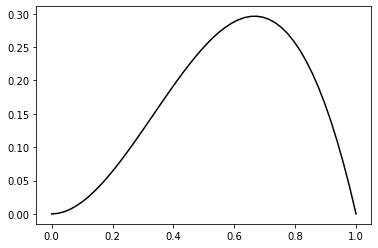

In [4]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, cubic(2, x), 'k')

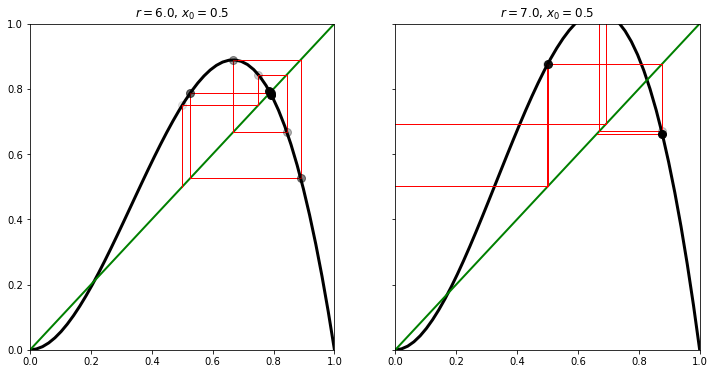

In [10]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the y=x diagonal line.
    t = np.linspace(0, 1) #Return evenly spaced numbers over a specified interval.
    ax.plot(t, cubic(r, t), 'k', lw=3) #cubic 
    ax.plot([0, 1], [0, 1], 'g', lw=2) #diagonal

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = cubic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], c='r', lw=1)  
        ax.plot([x, y], [y, y], c='r', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=8, alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

plot_system(6, 0.5, 10, ax=ax1)
plot_system(7, 0.5, 10, ax=ax2)
#plot_system(4, 0.5, 10, ax=ax2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Lyapunov exponent')

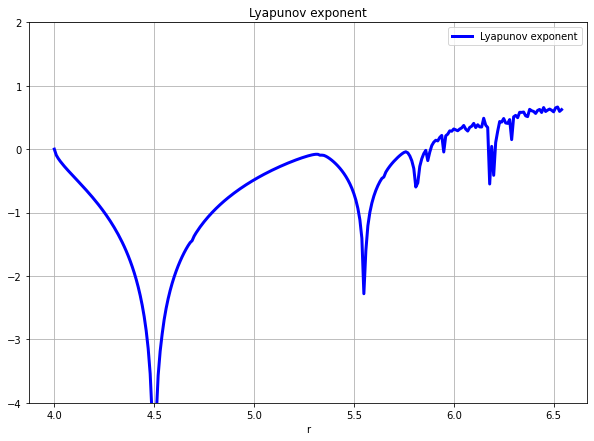

In [12]:
result = []
lambdas = []
maps = []
xmin = 3
xmax = 7
mult = (xmax - xmin)*2000

import numpy as np
import matplotlib.pyplot as plt
# show plots in notebook
% matplotlib inline

rvalues = np.arange(xmin, xmax, 0.01)

for r in rvalues:
    x = 0.5
    result = []
    for t in range(100):
        x = r*x**2 - r*x**3
        result.append(np.log(abs(r*(2*x - 3*(x**2)))))
    lambdas.append(np.mean(result))
   
    
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(xmin, xmax, mult)

# zero line
zero = [0]*mult
#ax1.plot(xticks, zero, 'g-')
#ax1.plot(xticks, maps, 'r.',alpha = 0.5, label = 'Cubic map')
#ax1.set_xlabel('r')
ax1.plot(rvalues, lambdas, 'b-', linewidth = 3, label = 'Lyapunov exponent')
ax1.set_ylim(-4, 2)
ax1.grid('on')
ax1.set_xlabel('r')
ax1.legend(loc='best')
ax1.set_title('Lyapunov exponent')